In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
from scipy.special import expit
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import *
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
BASE_PATH = "C:/Users/Aravi/OneDrive/Documents/DataSets/dos/"
if not os.path.exists(BASE_PATH):
     raise(Exception("CHECK THE BASE PATH"))

In [3]:
FILENAME = "dos_th1.6.dat"
PATH = os.path.join(BASE_PATH, FILENAME)
if not os.path.exists(PATH):
    raise(Exception("FILE DOES NOT EXIST"))

ret = ret_alpha_beta_Ev(1.6)
Ev = ret[1]

In [4]:
df = pd.read_csv(PATH,header=None)
df.columns = ['E','DOS']
df.head()

,E,DOS
0,-1.000000,0.391805
1,-0.998004,0.391996
2,-0.996012,0.392187
3,-0.994024,0.392378
4,-0.992040,0.392569


(0.0, 1e-08)

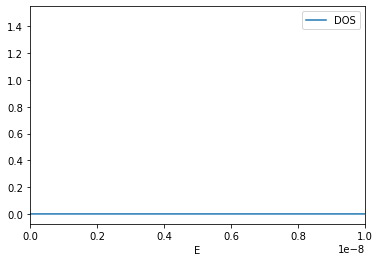

In [5]:
#df.plot(x='E',y='DOS',loglog=True)  #This one is only for magic angle
df.plot(x='E',y='DOS')
plt.xlim(0,0.00000001)
#plt.ylim(0,0.5)

In [6]:
idxE0 = df.query('E<0.000000000000000001 and E>-0.00000000000000001')['DOS'].idxmin()
df.iloc[[idxE0,idxE0+1]]

,E,DOS
20000,-4.421497e-18,1.231593e-15
20001,4.421497e-18,1.231593e-15


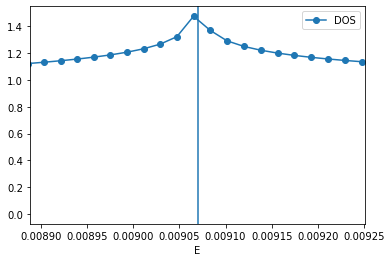

In [7]:
#df.plot(marker='o')
df.plot(x='E',y='DOS',marker='o')
plt.xlim(0.98*Ev/3,1.02*Ev/3)
plt.axvline(Ev/3)

In [8]:
ret

(array([-15.00746077,  48.4952549 ]),
 0.027209134045812648,
 (array([0.018165  , 0.03728378]), 135, 4))

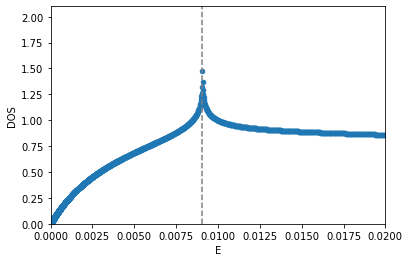

In [72]:
c = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
#df.plot('E','DOS',c=c(100))
df.plot.scatter('E','DOS')
ax = plt.gca()
ax.set_xlim(0,0.02)
ax.set_ylim(0,2.1)
ax.axvline(Ev/3,ls='--',c='gray')

c = df['E']/0.02 * 256


[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

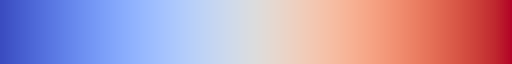

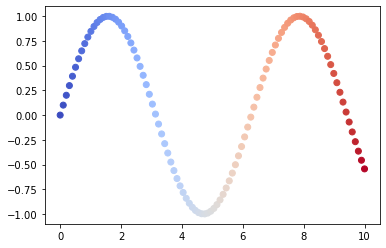

In [63]:
cm = sns.color_palette("coolwarm", as_cmap=True)
x = np.linspace(0,10,100)
y = np.sin(x)
plt.scatter(x,y,c=x/10 * 256,cmap = cm)
print((x/10))
cm

In [69]:
df.query('E<0.002 and E>-0.0000000000000000')['E']

20001    4.421497e-18
20002    4.430340e-18
20003    4.439201e-18
20004    4.448079e-18
20005    4.456976e-18
             ...     
36886    1.981743e-03
36887    1.985707e-03
36888    1.989678e-03
36889    1.993658e-03
36890    1.997645e-03
Name: E, Length: 16890, dtype: float64

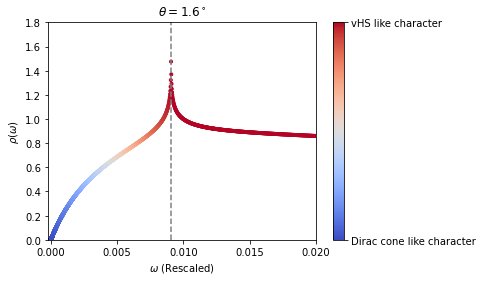

In [111]:
X = df.query('E<0.02 and E>-0.0000000000000000')['E']
Y = df.query('E<0.02 and E>-0.0000000000000000')['DOS']
c_array = np.array([xval if xval<Ev/3 else Ev/3 for xval in X ])
cscale = 3*c_array/Ev * 1
plt.scatter(X,Y, c = cscale,cmap = cm,marker ='.')
plt.axvline(Ev/3,ls = '--',c='gray')
#plt.clim(0,Ev/3)
plt.clim(0,1)
plt.ylim(0,1.8)
plt.xlim(-0.0002,0.02)
plt.xlabel('$\\omega$ (Rescaled)')
plt.ylabel(r'$\rho(\omega)$')
plt.title('$\\theta = 1.6^\circ$')
cbar = plt.colorbar(ticks=[0,1])
cbar.ax.set_yticklabels(['Dirac cone like character','vHS like character'])
plt.savefig('FigsPaper/changingcharacter.pdf')